In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [ ]:
data=pd.read_csv("IMDB Dataset.csv")
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
#checking for NAs
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
#converting to lowercase
data['review'] = data['review'].str.lower()
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [ ]:
data['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
#converting 'positive' to 1, 'negative' to 0
data['sentiment'].replace({'positive':1, 'negative':0}, inplace=True)
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. <br /><br />the...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


In [ ]:
#removing html markups, eg <br>...</br>
import re
def remove_bracket_text(text):
    return re.sub('\<.*?\>', '', text)

data['review'] = data['review'].apply(remove_bracket_text)
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


In [ ]:
#removing special characters
def remove_sp_char(text):
    return re.sub(r'[^a-zA-z0-9\s]', '', text)

data['review']=data['review'].apply(remove_sp_char)
data.head(10)

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1
5,probably my alltime favorite movie a story of ...,1
6,i sure would like to see a resurrection of a u...,1
7,this show was an amazing fresh innovative ide...,0
8,encouraged by the positive comments about this...,0
9,if you like original gut wrenching laughter yo...,1


(-0.5, 399.5, 199.5, -0.5)

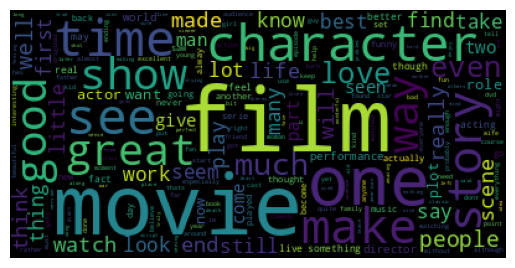

In [ ]:
pos = data[data['sentiment'] == 1]
neg = data[data['sentiment'] == 0]

#generating word cloud for positive reviews
from wordcloud import WordCloud
text = " ".join(pos['review'])
wc = WordCloud().generate(text)
plt.imshow(wc)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

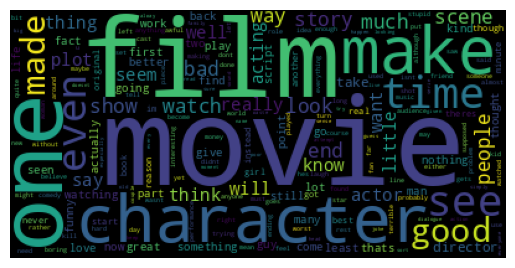

In [ ]:
#generating word cloud for negative reviews
text = " ".join(neg['review'])
wc = WordCloud().generate(text)
plt.imshow(wc)
plt.axis('off')

In [ ]:
#TEXT PREPROCESSING

#tokenization
data['review'] = data['review'].str.split()
data.head(15)

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",1
1,"[a, wonderful, little, production, the, filmin...",1
2,"[i, thought, this, was, a, wonderful, way, to,...",1
3,"[basically, theres, a, family, where, a, littl...",0
4,"[petter, matteis, love, in, the, time, of, mon...",1
5,"[probably, my, alltime, favorite, movie, a, st...",1
6,"[i, sure, would, like, to, see, a, resurrectio...",1
7,"[this, show, was, an, amazing, fresh, innovati...",0
8,"[encouraged, by, the, positive, comments, abou...",0
9,"[if, you, like, original, gut, wrenching, laug...",1


In [ ]:
#removing redundant words like 'movie' and 'film'
def rem(text):
  no_use_words = ['movies','films','movie','film']
  return [word for word in text if word not in no_use_words]

data['review'] = data['review'].apply(rem)
data.head(15)

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",1
1,"[a, wonderful, little, production, the, filmin...",1
2,"[i, thought, this, was, a, wonderful, way, to,...",1
3,"[basically, theres, a, family, where, a, littl...",0
4,"[petter, matteis, love, in, the, time, of, mon...",1
5,"[probably, my, alltime, favorite, a, story, of...",1
6,"[i, sure, would, like, to, see, a, resurrectio...",1
7,"[this, show, was, an, amazing, fresh, innovati...",0
8,"[encouraged, by, the, positive, comments, abou...",0
9,"[if, you, like, original, gut, wrenching, laug...",1


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words[1:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
#removing stopwords
def stop(text):
  return [word for word in text if word not in stop_words]

data['review'] = data['review'].apply(stop)
data.head(10)

,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",1
1,"[wonderful, little, production, filming, techn...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, theres, family, little, boy, jake,...",0
4,"[petter, matteis, love, time, money, visually,...",1
5,"[probably, alltime, favorite, story, selflessn...",1
6,"[sure, would, like, see, resurrection, dated, ...",1
7,"[show, amazing, fresh, innovative, idea, 70s, ...",0
8,"[encouraged, positive, comments, looking, forw...",0
9,"[like, original, gut, wrenching, laughter, lik...",1


In [ ]:
#lemmatizing
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmit_it(text):
  return [lemmatizer.lemmatize(word, pos='v') for word in text]

data['review'] = data['review'].apply(lambda x: ' '.join(lemmit_it(x)))
data.head(15)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,sentiment
0,one reviewers mention watch 1 oz episode youll...,1
1,wonderful little production film technique una...,1
2,think wonderful way spend time hot summer week...,1
3,basically theres family little boy jake think ...,0
4,petter matteis love time money visually stun w...,1
5,probably alltime favorite story selflessness s...,1
6,sure would like see resurrection date seahunt ...,1
7,show amaze fresh innovative idea 70s first air...,0
8,encourage positive comment look forward watch ...,0
9,like original gut wrench laughter like young o...,1


In [ ]:
#stemming
#from nltk.stem import PorterStemmer
#ps = PorterStemmer()

#def stemmer(text):
  #return [ps.stem(word) for word in text]
#data['review'] = data['review'].apply(stemmer)
#data.head(15)

(-0.5, 399.5, 199.5, -0.5)

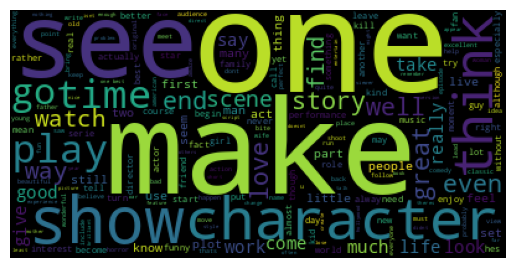

In [ ]:
pos = data[data['sentiment'] == 1]
neg = data[data['sentiment'] == 0]

#generating word cloud for positive reviews after text pre-processing
from wordcloud import WordCloud
text = " ".join(pos['review'])
wc = WordCloud().generate(text)
plt.imshow(wc)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

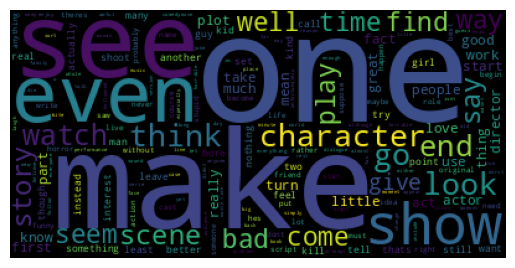

In [ ]:
#generating word cloud for negative reviews after text pre-processing
text = " ".join(neg['review'])
wc = WordCloud().generate(text)
plt.imshow(wc)
plt.axis('off')

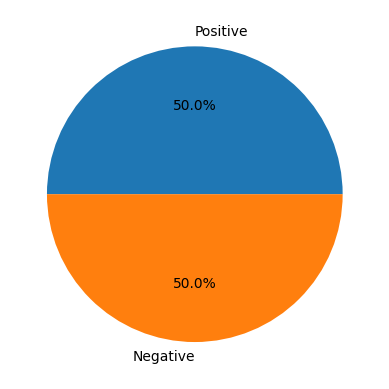

In [ ]:
#count of positive reviews vs negative reviews
x=[pos['sentiment'].count(), neg['sentiment'].count()]
pie = plt.pie(x, labels = ["Positive", "Negative"], autopct ='%1.1f%%')

In [ ]:
#creating test and train datasets
print(data.shape)
nrows,ncols = data.shape
train_data = data.head(int(nrows*0.75))
test_data = data.tail(int(nrows*0.25))

(10000, 2)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

#to print accuracy and plot confusion matrix
def evaluate(y_true, y_pred):
  accuracy = round(accuracy_score(y_true, y_pred)*100, 2)
  cm = confusion_matrix(y_true, y_pred)
  print("Accuracy: ",accuracy,"%")
  print("Confusion Matrix:\n",cm)
  sns.heatmap(cm, annot=True, fmt='g')

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#SIA uses bag-of-words approach
sia = SentimentIntensityAnalyzer()
print(sia.polarity_scores('I am so happy!'))
print(sia.polarity_scores('This is the worst thing ever.'))

res=[]
for text in data['review']:
  res.append(sia.polarity_scores(text))

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}
{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}


In [ ]:
rating=[]
for x in res:
  rating.append(1) if x['compound'] >= 0 else rating.append(0)

data["score"] = rating
data.head(20)

,review,sentiment,score
0,one reviewers mention watch 1 oz episode youll...,1,0
1,wonderful little production film technique una...,1,1
2,think wonderful way spend time hot summer week...,1,1
3,basically theres family little boy jake think ...,0,0
4,petter matteis love time money visually stun w...,1,1
5,probably alltime favorite story selflessness s...,1,1
6,sure would like see resurrection date seahunt ...,1,1
7,show amaze fresh innovative idea 70s first air...,0,1
8,encourage positive comment look forward watch ...,0,0
9,like original gut wrench laughter like young o...,1,1


Accuracy:  68.34 %
Confusion Matrix:
 [[2494 2478]
 [ 688 4340]]


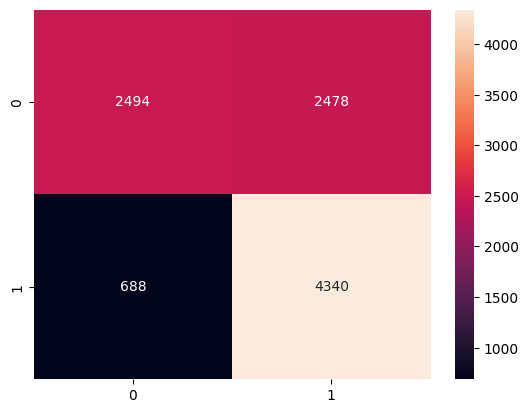

In [ ]:
evaluate(data['sentiment'], data['score'])

In [ ]:
#FEATURE EXTRACTION

from gensim.test.utils import common_texts
from gensim.models import Word2Vec

#text vectorization using Word2Vec
x=data['review'].str.split()
w2v = Word2Vec(x, min_count=1,vector_size = 15, sg=0)
print(w2v.wv['good'])   #vector representation of any word

[-2.1579425   2.5998738   3.9099848  -2.3319654   1.9880443   3.054442
 -1.6063406  -1.3857734  -0.92031336  0.06199005  1.2505707   2.7761846
  4.0392942  -1.188044   -2.0166554 ]


0.7874613
[('amateurs', 0.9148789048194885), ('decent', 0.9129167199134827), ('cool', 0.8969258069992065), ('blondie', 0.8959458470344543), ('shownafter', 0.8902789354324341), ('beforerelative', 0.8881617188453674), ('well', 0.8872933387756348), ('bad', 0.8867473602294922), ('great', 0.8848263621330261), ('pap', 0.8847653865814209)]


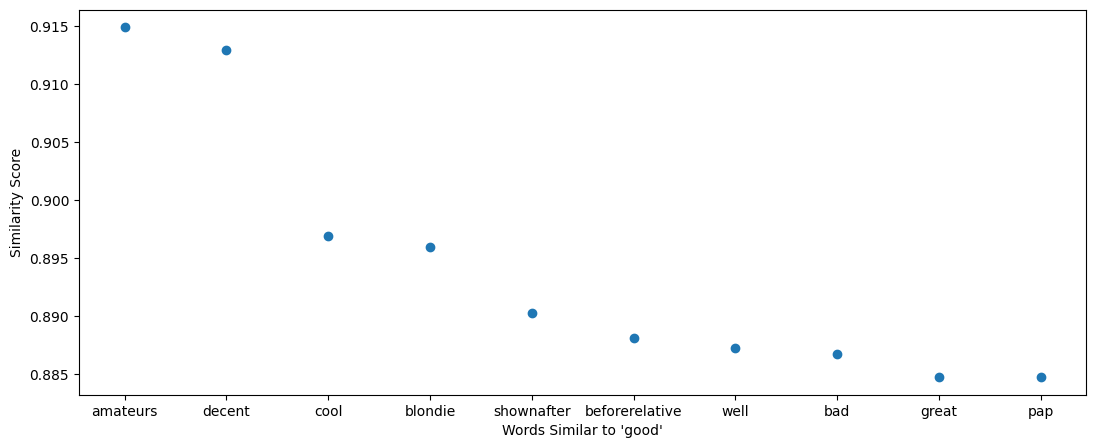

In [ ]:
print(w2v.wv.similarity('good', 'like'))   #similarity between two words
print(w2v.wv.most_similar('good', topn=10))   #get other similar words
plt.figure(figsize=(13,5))
plt.xlabel("Words Similar to 'good'")
plt.ylabel("Similarity Score")
plt.scatter(*zip(*w2v.wv.most_similar('good', topn=10)))

In [ ]:
#text vectorization using Count Vectorizer (bag-of-words)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer()

cv_train = vectorizer.fit_transform(train_data['review'])
print(vectorizer.get_feature_names_out())
print('CV_train:',cv_train.shape)

df = pd.DataFrame(data=cv_train.toarray(),columns = vectorizer.get_feature_names_out())
print(df)

['00' '000' '0069' ... 'zzzzip' 'zzzzzzzzzzzz' 'zzzzzzzzzzzzzzzzzz']
CV_train: (7500, 61986)
      00  000  0069  007  007s  00s  01  010  0126  02  ...  zurich  zuthe  \
0      0    0     0    0     0    0   0    0     0   0  ...       0      0   
1      0    0     0    0     0    0   0    0     0   0  ...       0      0   
2      0    0     0    0     0    0   0    0     0   0  ...       0      0   
3      0    0     0    0     0    0   0    0     0   0  ...       0      0   
4      0    0     0    0     0    0   0    0     0   0  ...       0      0   
...   ..  ...   ...  ...   ...  ...  ..  ...   ...  ..  ...     ...    ...   
7495   0    0     0    0     0    0   0    0     0   0  ...       0      0   
7496   0    0     0    0     0    0   0    0     0   0  ...       0      0   
7497   0    0     0    0     0    0   0    0     0   0  ...       0      0   
7498   0    0     0    0     0    0   0    0     0   0  ...       0      0   
7499   0    0     0    0     0    0   0    0     

In [ ]:
cv_test = vectorizer.transform(test_data['review'])
print('CV_test:',cv_test.shape)
df = pd.DataFrame(data=cv_test.toarray(),columns = vectorizer.get_feature_names_out())
print(df[["like","love","good","best","bad","dumb","hate","disappoint"]])

CV_test: (2500, 61986)
      like  love  good  best  bad  dumb  hate  disappoint
0        0     0     0     0    0     0     0           0
1        1     0     2     0    1     0     1           0
2        1     0     0     0    0     0     0           0
3        2     0     0     0    0     0     0           1
4        0     1     0     0    0     0     0           0
...    ...   ...   ...   ...  ...   ...   ...         ...
2495     0     2     0     0    0     0     0           0
2496     0     0     1     0    0     0     0           0
2497     2     1     0     0    3     0     0           0
2498     0     0     2     0    0     0     0           0
2499     0     0     0     0    0     0     0           0

[2500 rows x 8 columns]


In [ ]:
#text vectorization using TF-IDF

tv=TfidfVectorizer(min_df=0,max_df=1, use_idf=True, ngram_range=(1,3))
tv_train=tv.fit_transform(train_data['review'])
tv_test=tv.transform(test_data['review'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1]
Accuracy:  86.8 %
Confusion Matrix:
 [[1052  172]
 [ 158 1118]]


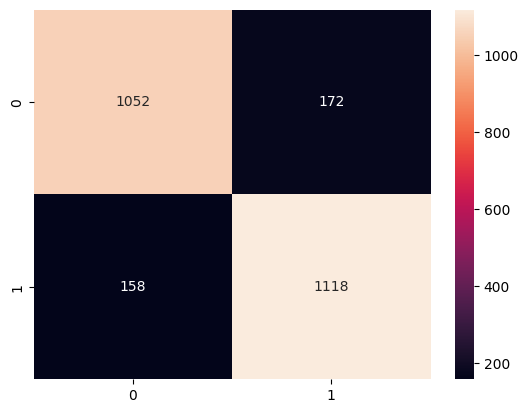

In [ ]:
#modelling CV using Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(cv_train,train_data['sentiment'])
pred = lr.predict(cv_test)
print(pred[1:20])

evaluate(test_data['sentiment'], pred)

Accuracy:  69.0 %
Confusion Matrix:
 [[857 367]
 [408 868]]


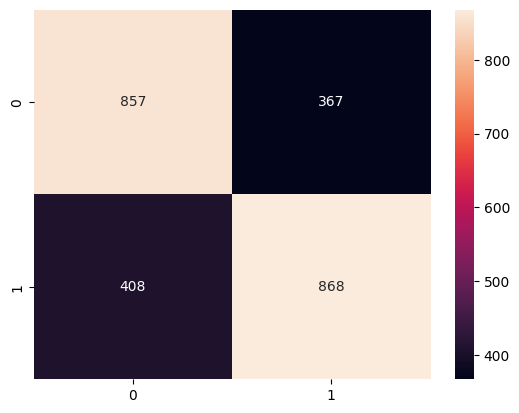

In [ ]:
#modelling TF-IDF using Logistic Regression
lr.fit(tv_train,train_data['sentiment'])
pred = lr.predict(tv_test)

evaluate(test_data['sentiment'], pred)

Accuracy:  83.6 %
Confusion Matrix:
 [[1069  155]
 [ 255 1021]]


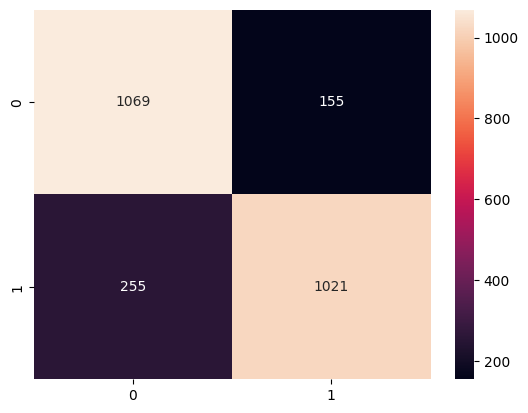

In [ ]:
#modelling CV using Bernoulli's Naive Bayes
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(alpha = 2)
bnb.fit(cv_train,train_data['sentiment'])
pred = bnb.predict(cv_test)

evaluate(test_data['sentiment'], pred)

Accuracy:  49.88 %
Confusion Matrix:
 [[1223    1]
 [1252   24]]


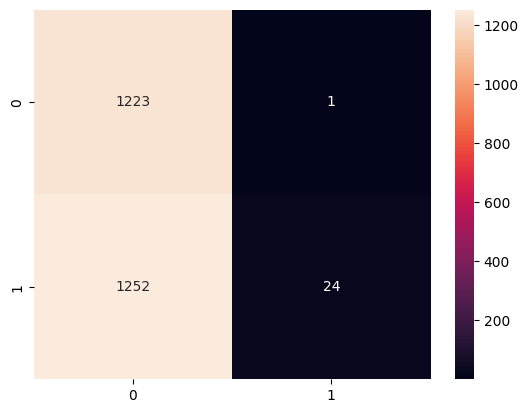

In [ ]:
#modelling TF-IDF using Bernoulli's Naive Bayes
bnb.fit(tv_train,train_data['sentiment'])
pred = bnb.predict(tv_test)

evaluate(test_data['sentiment'], pred)

Accuracy:  83.84 %
Confusion Matrix:
 [[1050  174]
 [ 230 1046]]


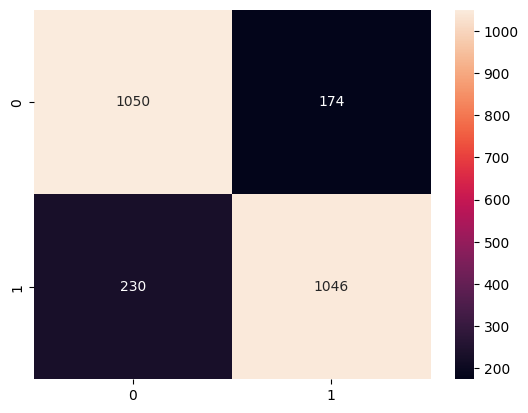

In [ ]:
#modelling CV using Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(cv_train,train_data['sentiment'])
pred = mnb.predict(cv_test)

evaluate(test_data['sentiment'], pred)

Accuracy:  69.16 %
Confusion Matrix:
 [[870 354]
 [417 859]]


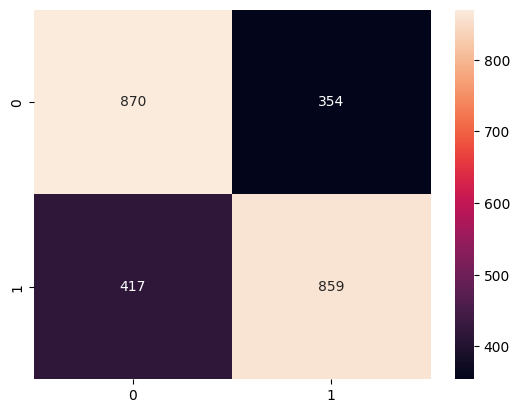

In [ ]:
#modelling TF-IDF using Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(tv_train,train_data['sentiment'])
pred = mnb.predict(tv_test)

evaluate(test_data['sentiment'], pred)

Accuracy:  83.96 %
Confusion Matrix:
 [[1027  197]
 [ 204 1072]]


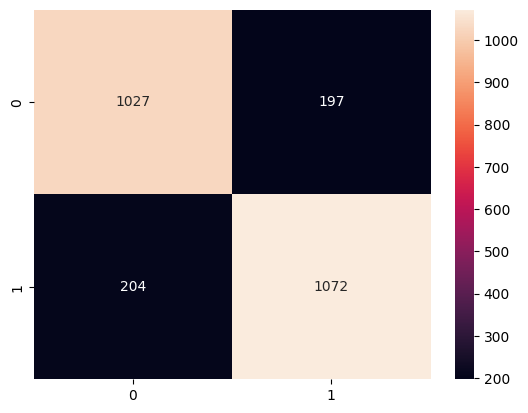

In [ ]:
#modelling CV using Linear SVM
from sklearn.svm import SVC
svc = SVC(kernel='linear') 
svc.fit(cv_train,train_data['sentiment'])
pred = svc.predict(cv_test)

evaluate(test_data['sentiment'], pred)

Accuracy:  69.04 %
Confusion Matrix:
 [[863 361]
 [413 863]]


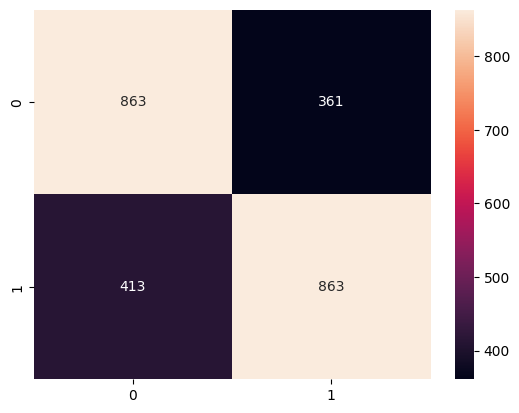

In [ ]:
#modelling TF-IDF using Linear SVM
svc.fit(tv_train,train_data['sentiment'])
pred = svc.predict(tv_test)

evaluate(test_data['sentiment'], pred)